In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [85]:
data = pd.read_csv('/content/tips (data for regression problem).csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [86]:
import scipy.stats as stats

# Perform ANOVA test
anova_results = stats.f_oneway(
    data[data['day'] == 'Thur']['tip'],
    data[data['day'] == 'Fri']['tip'],
    data[data['day'] == 'Sat']['tip'],
    data[data['day'] == 'Sun']['tip']
)

print(f'ANOVA F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')

ANOVA F-statistic: 1.6723551980998699, p-value: 0.1735885553040592


P-value is not less than 0.05 so day of the week has no significant effect on tips.

In [87]:
from scipy import stats

# Separate tips for lunch and dinner
lunch_tips = data[data['time'] == 'Lunch']['tip']
dinner_tips = data[data['time'] == 'Dinner']['tip']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(lunch_tips, dinner_tips)
print(f'T-test Statistic: {t_statistic}, p-value: {p_value}')

T-test Statistic: -1.9062569301202392, p-value: 0.05780153475171558


pvalue is close to 0.05 so time of day is not that significant but effects.

In [62]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


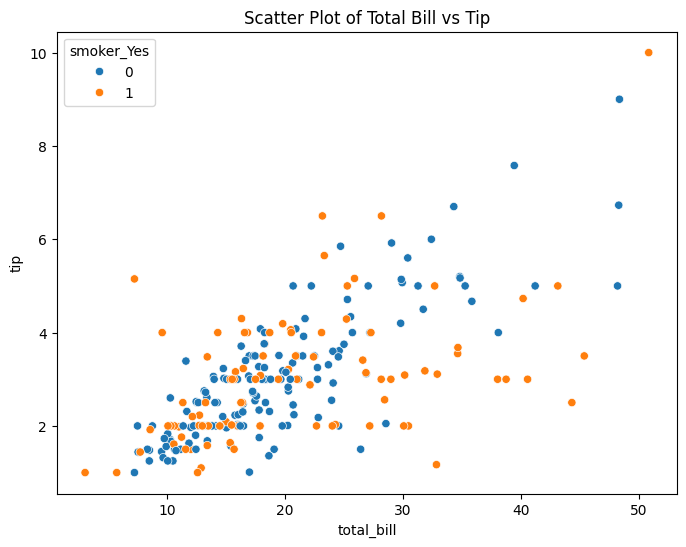

In [82]:
# Scatter plot of total bill vs tip
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_encoded, x="total_bill", y="tip", hue = 'smoker_Yes')
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

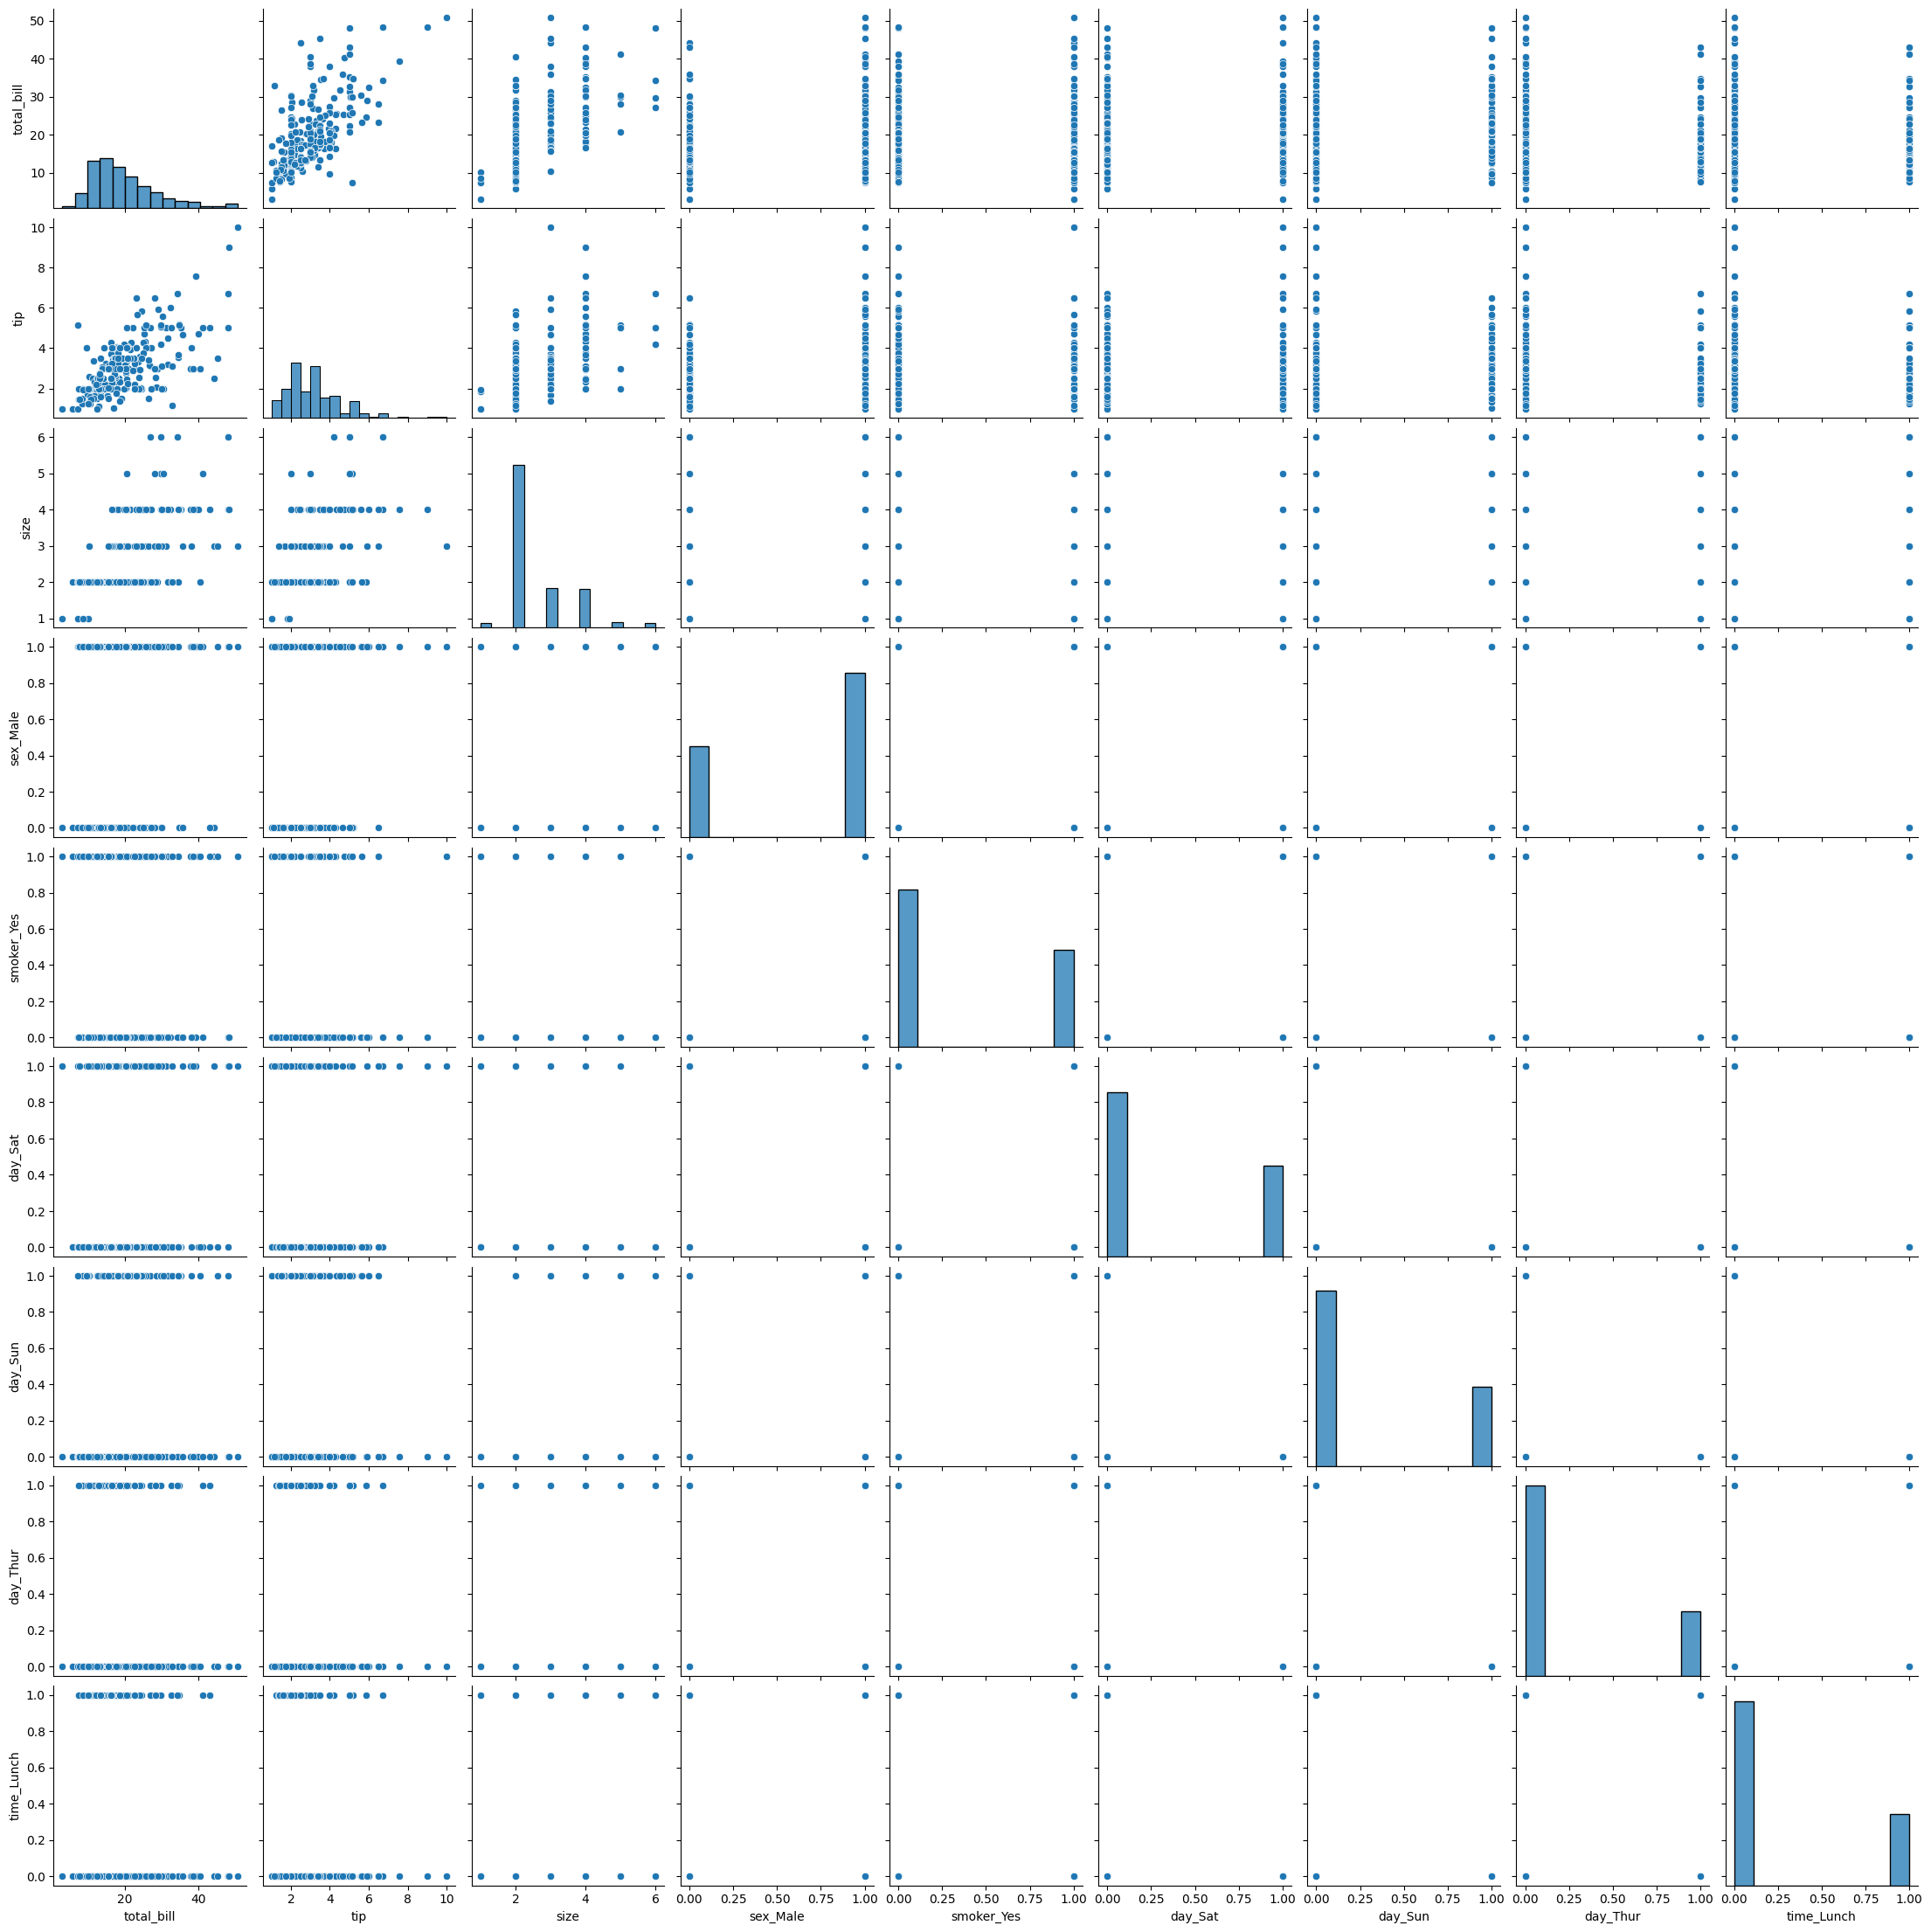

In [66]:
# Pair plot for multiple features
sns.pairplot(data)
plt.show()

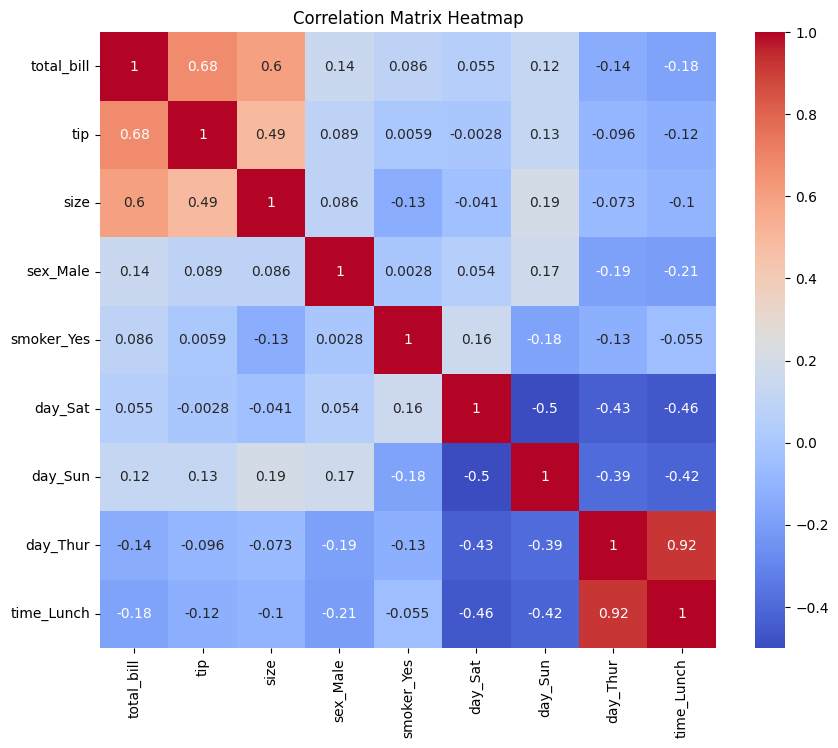

In [67]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Divide the data for training and testing

In [68]:
X = data_encoded.drop("tip", axis=1)
y = data_encoded["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression

In [69]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
r2_score(y_test, y_pred)

0.43730181943482493

Ridge Regression

In [70]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.4393889716178484

Lasso Regression

In [71]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.5273068720881755

Decision Tree Regression

In [73]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
r2_score(y_test, y_pred_dt)

-0.004178121600921791

Random Forest Regression

In [74]:
rf_model = RandomForestRegressor(n_estimators=500,max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_score(y_test, y_pred_rf)

0.3507130196655781

Support Vector Machine

In [75]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
r2_score(y_test, y_pred_svr)

0.47802527943520123

In [76]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr_rbf = svr_model.predict(X_test)
r2_score(y_test, y_pred_svr_rbf)

0.5740891915042663

K-Nearest Neighbors

In [77]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
r2_score(y_test, y_pred_knn)

0.29888587066985495

In [98]:
lunch_tips = data[data['time'] == 'Lunch']['tip']
lunch_tips_avg = (lunch_tips.sum())/lunch_tips.nunique()
print('lunch_tips_avg: ',lunch_tips_avg)
dinner_tips = data[data['time'] == 'Dinner']['tip']
dinner_tips_avg = (dinner_tips.sum())/dinner_tips.nunique()
print('dinner_tips_avg: ',dinner_tips_avg)

lunch_tips_avg:  4.6377500000000005
dinner_tips_avg:  5.460699999999999


In [105]:
Female_tips = data[data['sex'] == 'Female']['tip']
Female_tips_avg = (Female_tips.sum())/Female_tips.nunique()
print('Female_tips_avg: ',Female_tips_avg)
Male_tips = data[data['sex'] == 'Male']['tip']
Male_tips_avg = (Male_tips.sum())/Male_tips.nunique()
print('Male_tips_avg: ',Male_tips_avg)


Female_tips_avg:  5.030816326530611
Male_tips_avg:  5.389666666666667



Strategies to increase tips

1. During dinner tips are more so increasing cunstomer services may increase tips.
2. Incresing the offers may increase tips.
3. Usually tips are given as rounding off to bill amount. So bill amount should not be close to rounded digits. This may increase tips.



